### Import the libraries

---------------------------------------------------------------------------------------------------------------------------

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import eda_helper_functions
from sklearn.ensemble import IsolationForest
import seaborn as sns

### Read the Training Data

---------------------------------------------------------------------------------------------------------------------------

In [2]:
file_path = r'C:\Users\Dell\Desktop\Machine Learning\FLight Price Predictions (AWS Sagemaker)\Data\train.csv'
train = pd.read_csv(file_path)
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,03-03-2019,Delhi,Cochin,02:15:00,04:25:00,1570,1,No Info,17024
1,Vistara,24-03-2019,Kolkata,Banglore,07:10:00,18:45:00,695,1,No Info,16932
2,Spicejet,09-04-2019,Banglore,Delhi,09:30:00,12:20:00,170,0,No Info,4423
3,Indigo,27-04-2019,Banglore,Delhi,21:15:00,00:15:00,180,0,No Info,3943
4,Air India,12-06-2019,Delhi,Cochin,09:45:00,09:25:00,1420,1,No Info,7480


#### ***Checking the datatypes and making the appropriate changes if neccessary***

In [3]:
train.dtypes

airline            object
date_of_journey    object
source             object
destination        object
dep_time           object
arrival_time       object
duration            int64
total_stops         int64
additional_info    object
price               int64
dtype: object

In [4]:
train = train.assign(**{
            col: pd.to_datetime(train.loc[:, col], dayfirst=True)
            for col in ['date_of_journey','dep_time','arrival_time']
        })

In [5]:
train.head()

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price
0,Jet Airways,2019-03-03,Delhi,Cochin,2024-09-15 02:15:00,2024-09-15 04:25:00,1570,1,No Info,17024
1,Vistara,2019-03-24,Kolkata,Banglore,2024-09-15 07:10:00,2024-09-15 18:45:00,695,1,No Info,16932
2,Spicejet,2019-04-09,Banglore,Delhi,2024-09-15 09:30:00,2024-09-15 12:20:00,170,0,No Info,4423
3,Indigo,2019-04-27,Banglore,Delhi,2024-09-15 21:15:00,2024-09-15 00:15:00,180,0,No Info,3943
4,Air India,2019-06-12,Delhi,Cochin,2024-09-15 09:45:00,2024-09-15 09:25:00,1420,1,No Info,7480


### Summary of Data

---------------------------------------------------------------------------------------------------------------------------

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6835 entries, 0 to 6834
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   airline          6835 non-null   object        
 1   date_of_journey  6835 non-null   datetime64[ns]
 2   source           6835 non-null   object        
 3   destination      6835 non-null   object        
 4   dep_time         6835 non-null   datetime64[ns]
 5   arrival_time     6835 non-null   datetime64[ns]
 6   duration         6835 non-null   int64         
 7   total_stops      6835 non-null   int64         
 8   additional_info  6835 non-null   object        
 9   price            6835 non-null   int64         
dtypes: datetime64[ns](3), int64(3), object(4)
memory usage: 534.1+ KB


In [7]:
train.describe()

,duration,total_stops,price
count,6835.000000,6835.000000,6835.000000
mean,637.429407,0.819166,9081.006730
std,504.544468,0.676164,4607.703224
min,75.000000,0.000000,1759.000000
25%,170.000000,0.000000,5228.000000
50%,510.000000,1.000000,8366.000000
75%,927.500000,1.000000,12373.000000
max,2860.000000,3.000000,62427.000000


In [8]:
(
    train
    .assign(total_stops = train['total_stops'].astype(object))
    .describe(include= ['O'])
)

,airline,source,destination,total_stops,additional_info
count,6835,6835,6835,6835,6835
unique,9,5,6,4,9
top,Jet Airways,Delhi,Cochin,1,No Info
freq,2453,2859,2859,3583,5367


### Analysis of Missing values

---------------------------------------------------------------------------------------------------------------------------

In [9]:
eda_helper_functions.missing_info(train)

,count,percentage
variable,,


### Analysis of Outliers

---------------------------------------------------------------------------------------------------------------------------

- Using Isolation Forest

In [10]:
forest = IsolationForest(n_estimators=10, random_state = 42)

In [15]:
(
    train
    .assign(outlier = forest.fit_predict(train
                                         .drop(columns = 'price')
                                         .select_dtypes(include = 'number')))
    .query('outlier == -1')
)

,airline,date_of_journey,source,destination,dep_time,arrival_time,duration,total_stops,additional_info,price,outlier
0,Jet Airways,2019-03-03,Delhi,Cochin,2024-09-15 02:15:00,2024-09-15 04:25:00,1570,1,No Info,17024,-1
3,Indigo,2019-04-27,Banglore,Delhi,2024-09-15 21:15:00,2024-09-15 00:15:00,180,0,No Info,3943,-1
4,Air India,2019-06-12,Delhi,Cochin,2024-09-15 09:45:00,2024-09-15 09:25:00,1420,1,No Info,7480,-1
5,Indigo,2019-06-21,Mumbai,Hyderabad,2024-09-15 09:10:00,2024-09-15 10:40:00,90,0,No Info,5755,-1
9,Jet Airways,2019-05-09,Delhi,Cochin,2024-09-15 05:30:00,2024-09-15 12:35:00,425,2,In-flight meal not included,15544,-1
...,...,...,...,...,...,...,...,...,...,...,...
6825,Indigo,2019-06-27,Delhi,Cochin,2024-09-15 05:10:00,2024-09-15 10:05:00,295,1,No Info,6496,-1
6827,Jet Airways,2019-06-06,Delhi,Cochin,2024-09-15 21:50:00,2024-09-15 19:00:00,1270,1,No Info,14714,-1
6828,Spicejet,2019-03-24,Kolkata,Banglore,2024-09-15 22:20:00,2024-09-15 00:40:00,140,0,No Info,5831,-1
6829,Indigo,2019-06-24,Mumbai,Hyderabad,2024-09-15 12:00:00,2024-09-15 13:30:00,90,0,No Info,2754,-1


### Pair Plots

----------------------------------------------------------------------------------------------------------------------------

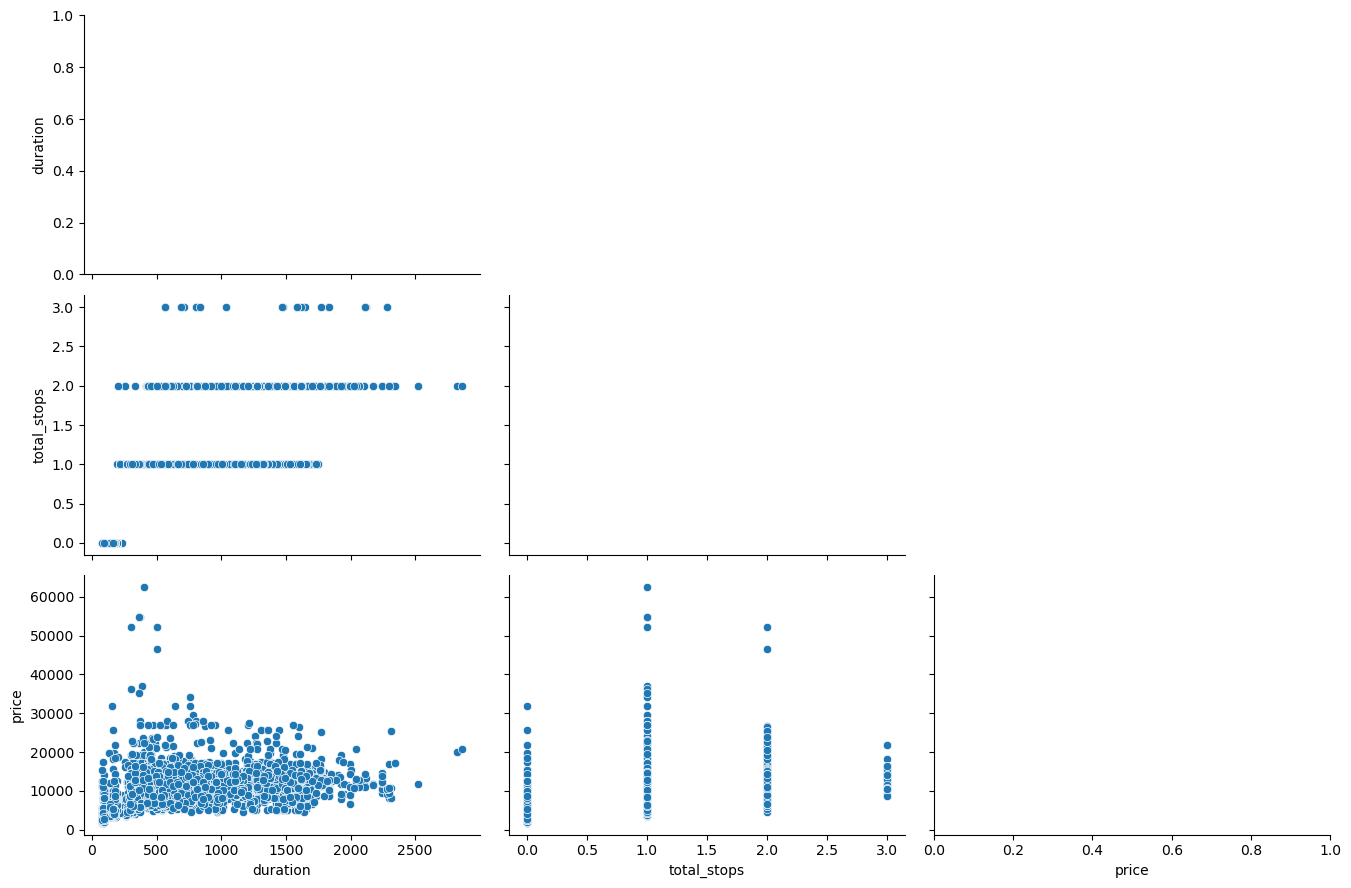

In [16]:
eda_helper_functions.pair_plots(train)

### Correlation Analysis

---------------------------------------------------------------------------------------------------------------------------

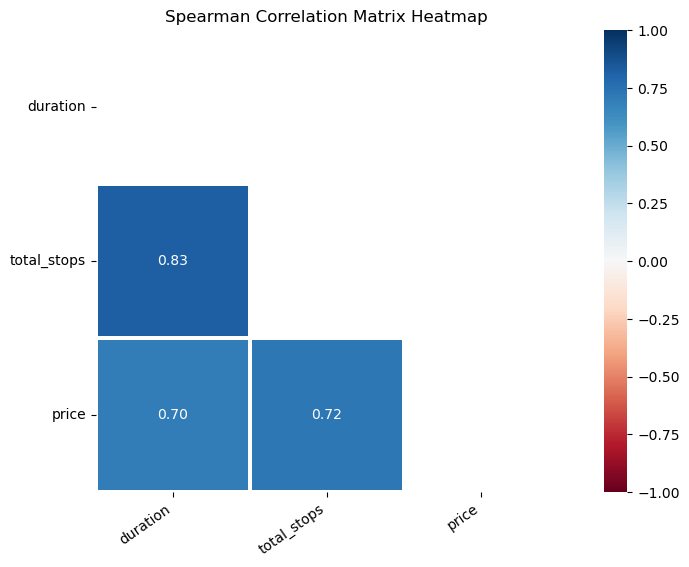

In [17]:
eda_helper_functions.correlation_heatmap(train)

### Detailed Analysis

---------------------------------------------------------------------------------------------------------------------------

In [18]:
train.columns 

Index(['airline', 'date_of_journey', 'source', 'destination', 'dep_time',
       'arrival_time', 'duration', 'total_stops', 'additional_info', 'price'],
      dtype='object')

#### 1. Airlines

In [19]:
train.airline

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6830         Indigo
6831         Indigo
6832      Air India
6833    Jet Airways
6834          Goair
Name: airline, Length: 6835, dtype: object

In [20]:
eda_helper_functions.cat_summary(train, "airline")

0       Jet Airways
1           Vistara
2          Spicejet
3            Indigo
4         Air India
           ...     
6830         Indigo
6831         Indigo
6832      Air India
6833    Jet Airways
6834          Goair
Name: airline, Length: 6835, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,835 / 6,835 rows


,
count,6835
unique,9
top,Jet Airways
freq,2453


,count,percentage
category,,
Jet Airways,2453,0.358888
Indigo,1341,0.196196
Air India,1130,0.165326
Multiple Carriers,754,0.110315
Spicejet,525,0.076811
Vistara,300,0.043892
Air Asia,207,0.030285
Goair,124,0.018142
Trujet,1,0.000146


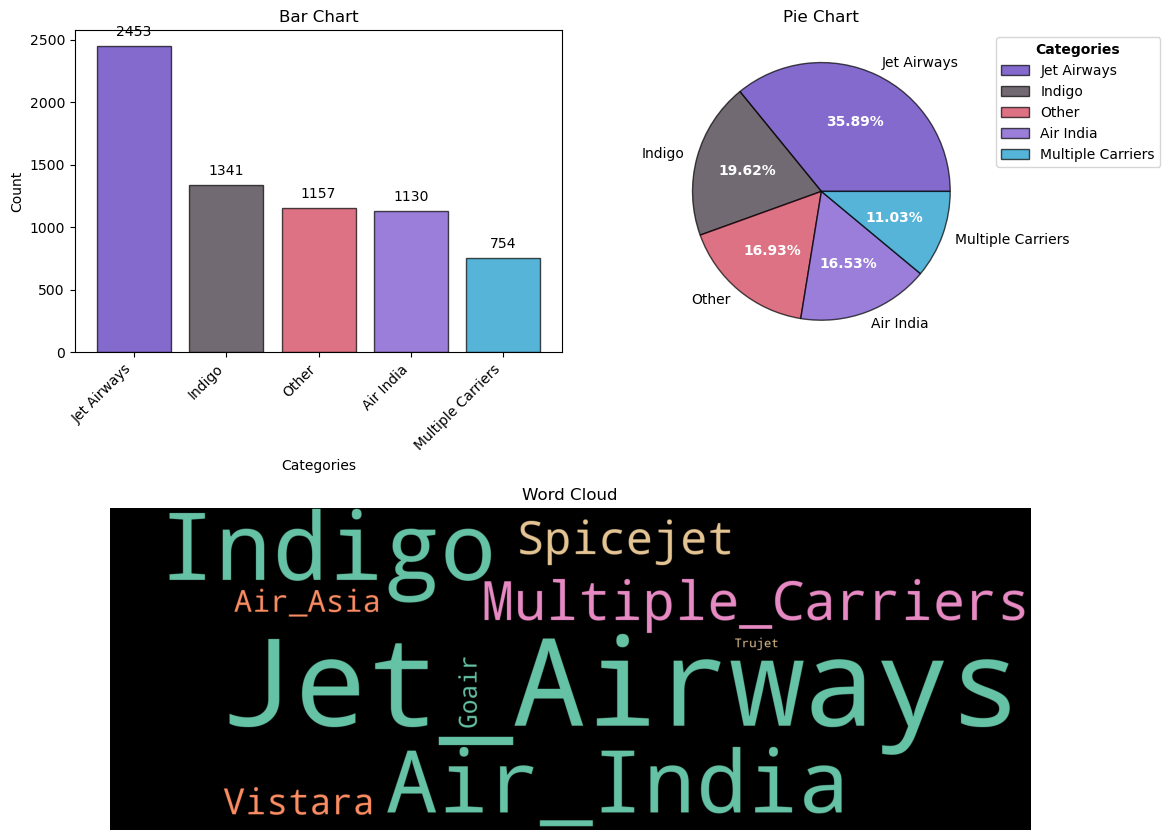

In [24]:
eda_helper_functions.cat_univar_plots(train, 'airline', k = 4)

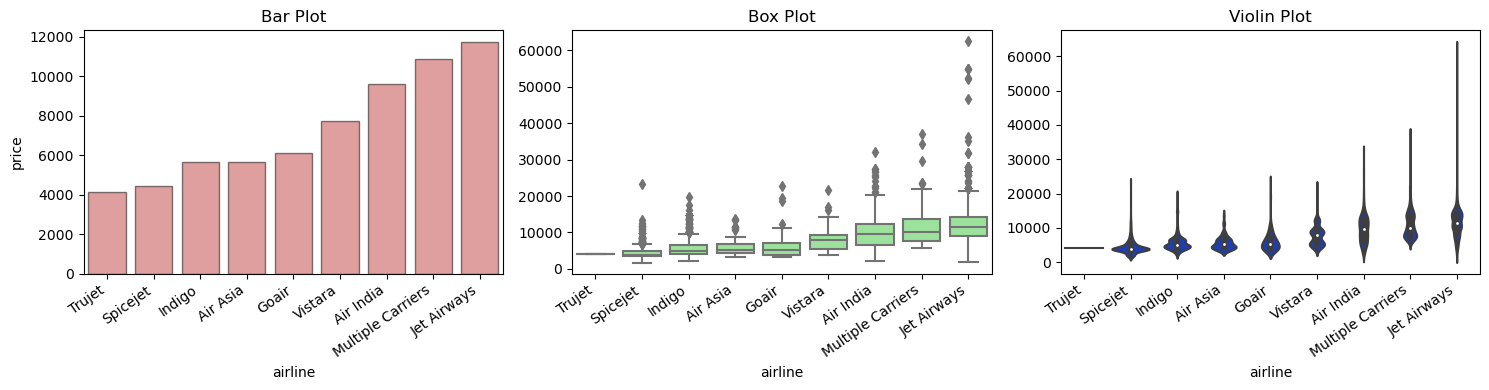

In [28]:
eda_helper_functions.num_cat_bivar_plots(
        data = train,
        num_var = 'price',
        cat_var = 'airline'
)

In [29]:
eda_helper_functions.num_cat_hyp_testing(train, num_var = 'price', cat_var = 'airline')

- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population mean
- Alternate Hypothesis : The groups don't have similar population mean
- Test Statistic       : 465.75733742948927
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


- Significance Level   : 5.0%
- Null Hypothesis      : The groups have similar population median
- Alternate Hypothesis : The groups don't have similar population median
- Test Statistic       : 3079.4708566160316
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and airline are associated to each other


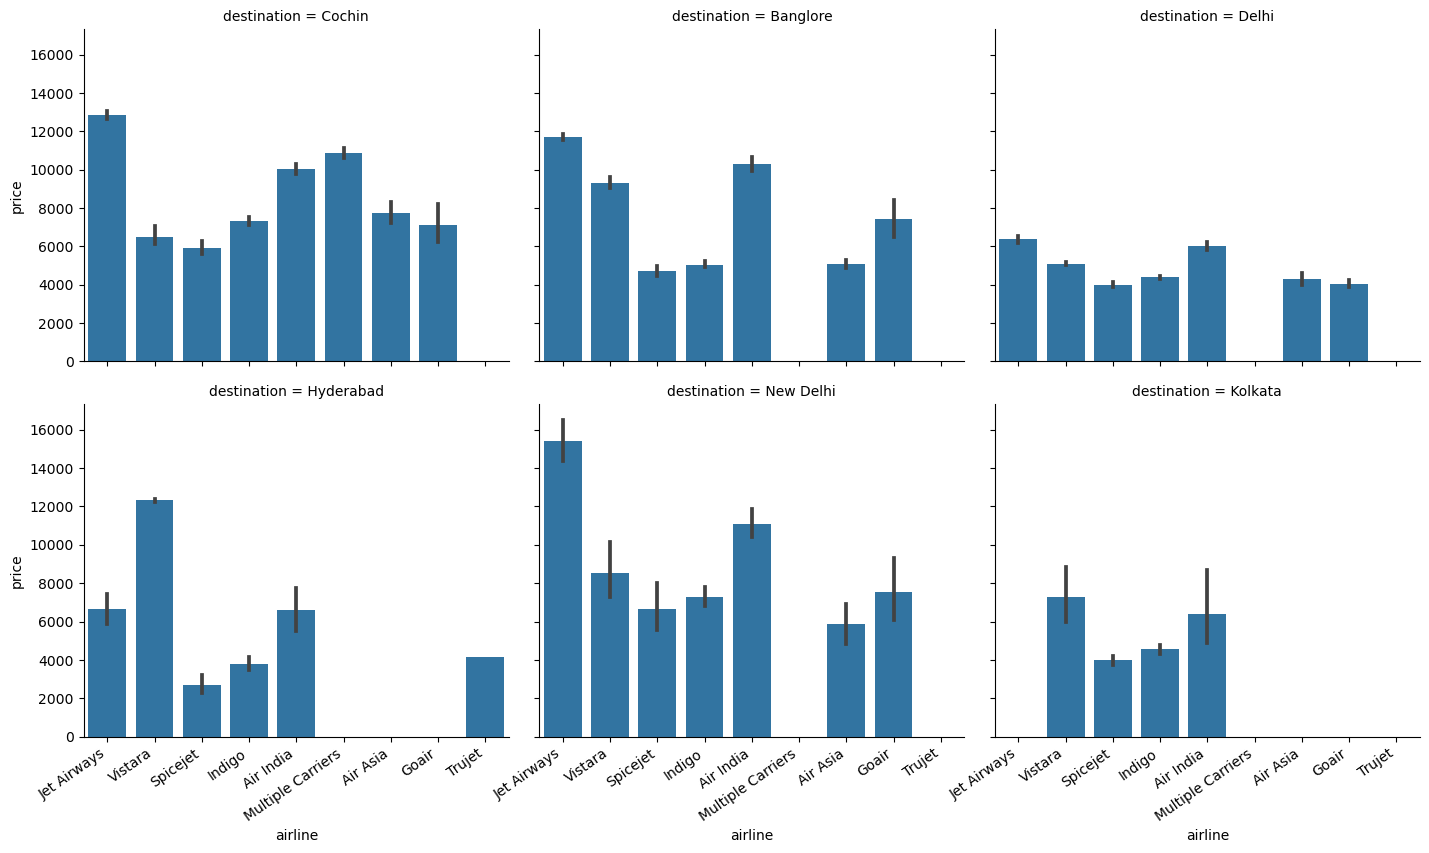

In [38]:
airline_grid = sns.FacetGrid(
    data = train,
    col = 'destination',
    col_wrap = 3,
    height = 4,
    aspect = 1.2,
    sharey = True
)

airline_grid.map(sns.barplot, 'airline' ,'price', order = train.airline.unique())

for axes in airline_grid.axes[3:]:
    eda_helper_functions.rotate_xlabels(axes)

#### 2. Date of Journey

In [39]:
train.date_of_journey

0      2019-03-03
1      2019-03-24
2      2019-04-09
3      2019-04-27
4      2019-06-12
          ...    
6830   2019-06-03
6831   2019-06-24
6832   2019-05-09
6833   2019-05-27
6834   2019-03-03
Name: date_of_journey, Length: 6835, dtype: datetime64[ns]

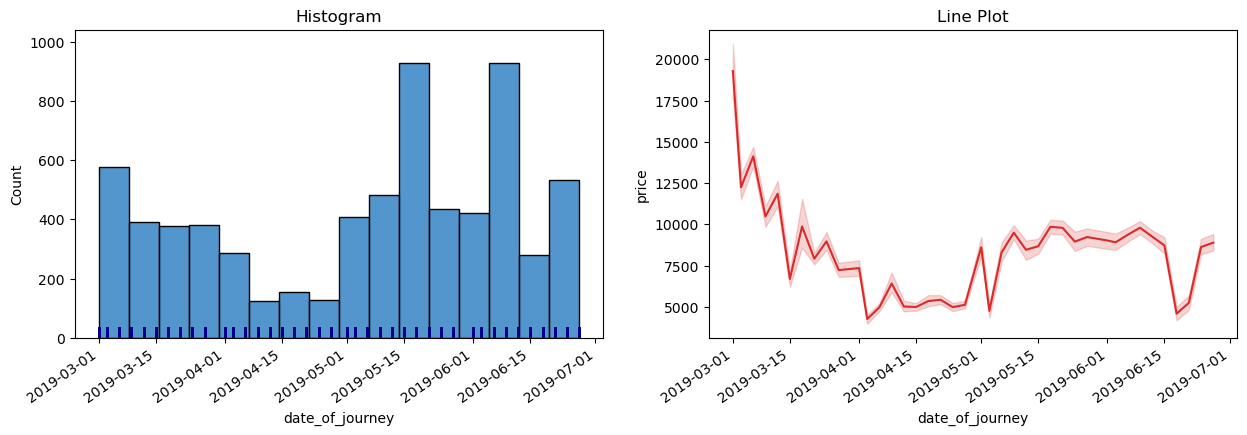

In [40]:
eda_helper_functions.dt_univar_plots(
    data = train,
    var = 'date_of_journey',
    target = 'price'
)

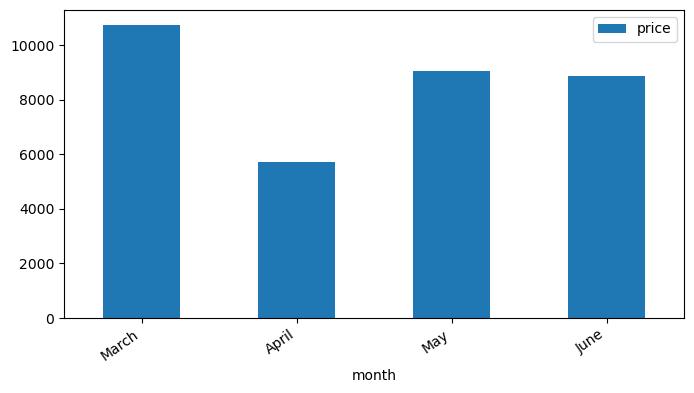

In [47]:
(
    train
    .groupby(pd.Grouper(key = "date_of_journey", freq = "M"))
    .price.mean()
    .to_frame()
    .set_axis(['March','April','May','June'], axis = 0)
    .rename_axis(index = 'month')
    .plot(kind = 'bar', figsize = (8,4))
)

ax = plt.gca()
eda_helper_functions.rotate_xlabels(ax)

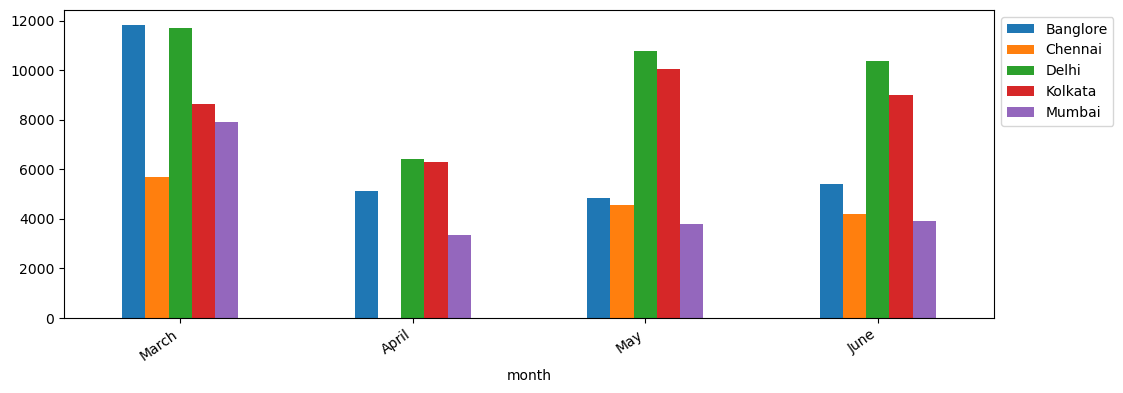

In [54]:
(
    train
    .groupby([pd.Grouper(key = 'date_of_journey', freq= 'M'), 'source'])
    .price.mean()
    .unstack()
    .set_axis(['March','April','May','June'], axis = 0)
    .rename_axis(index = 'month')
    .plot(kind = 'bar', figsize = (12,4))
)

ax = plt.gca()
ax.legend(
    loc = "upper left",
    bbox_to_anchor = (1,1)
)

eda_helper_functions.rotate_xlabels(ax)

#### 3. Depature Time

In [55]:
train.dep_time

0      2024-09-15 02:15:00
1      2024-09-15 07:10:00
2      2024-09-15 09:30:00
3      2024-09-15 21:15:00
4      2024-09-15 09:45:00
               ...        
6830   2024-09-15 04:00:00
6831   2024-09-15 05:05:00
6832   2024-09-15 10:00:00
6833   2024-09-15 07:05:00
6834   2024-09-15 14:10:00
Name: dep_time, Length: 6835, dtype: datetime64[ns]

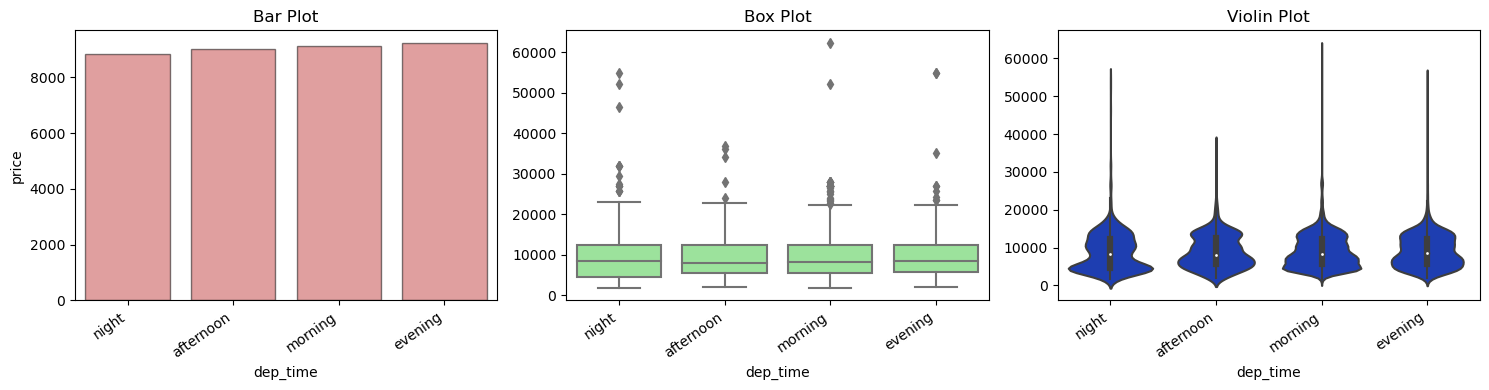

In [67]:
(
    train
    .assign(dep_time = lambda df_: 
        (np.select([df_.dep_time.dt.hour.between(4, 12, inclusive = 'left'),
                    df_.dep_time.dt.hour.between(12, 16, inclusive = 'left'),
                    df_.dep_time.dt.hour.between(16, 20, inclusive = 'left')],
                    ['morning',
                     'afternoon',
                     'evening'],
                    default = 'night')
    ))
    .pipe(eda_helper_functions.num_cat_bivar_plots, 'price', 'dep_time')
)

#### 4. Duration

In [68]:
train.duration

0       1570
1        695
2        170
3        180
4       1420
        ... 
6830     170
6831     665
6832     165
6833     330
6834     310
Name: duration, Length: 6835, dtype: int64

In [69]:
eda_helper_functions.num_summary(train, 'duration')

0       1570
1        695
2        170
3        180
4       1420
        ... 
6830     170
6831     665
6832     165
6833     330
6834     310
Name: duration, Length: 6835, dtype: int64

Data Type      : int64
Missing Data   : 0 rows (0.00 %)
Available Data : 6,835 / 6,835 rows


,value
percentile,
0,75.0
5,90.0
10,145.0
25,170.0
50,510.0
75,927.5
90,1440.0
95,1610.0
99,1843.3


,value
mean,637.429407
trimmed mean (5%),604.415732
trimmed mean (10%),576.009325
median,510.000000


,value
var,254565.120674
std,504.544468
IQR,757.500000
mad,340.000000
coef_variance,0.791530


,value
skewness,0.867294
kurtosis,-0.158793


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
p-value              : 0.0
Test Statistic       : 0.8873322606086731
- Since p-value is less than alpha (0.05), we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


Significance Level   : 0.05
Null Hypothesis      : The data is normally distributed
Alternate Hypothesis : The data is not normally distributed
Critical Value       : 0.787
Test Statistic       : 254.5470868913717
- Since the Test-statistic is greater than Critical Value, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: We conclude that the data sample is not normally distributed


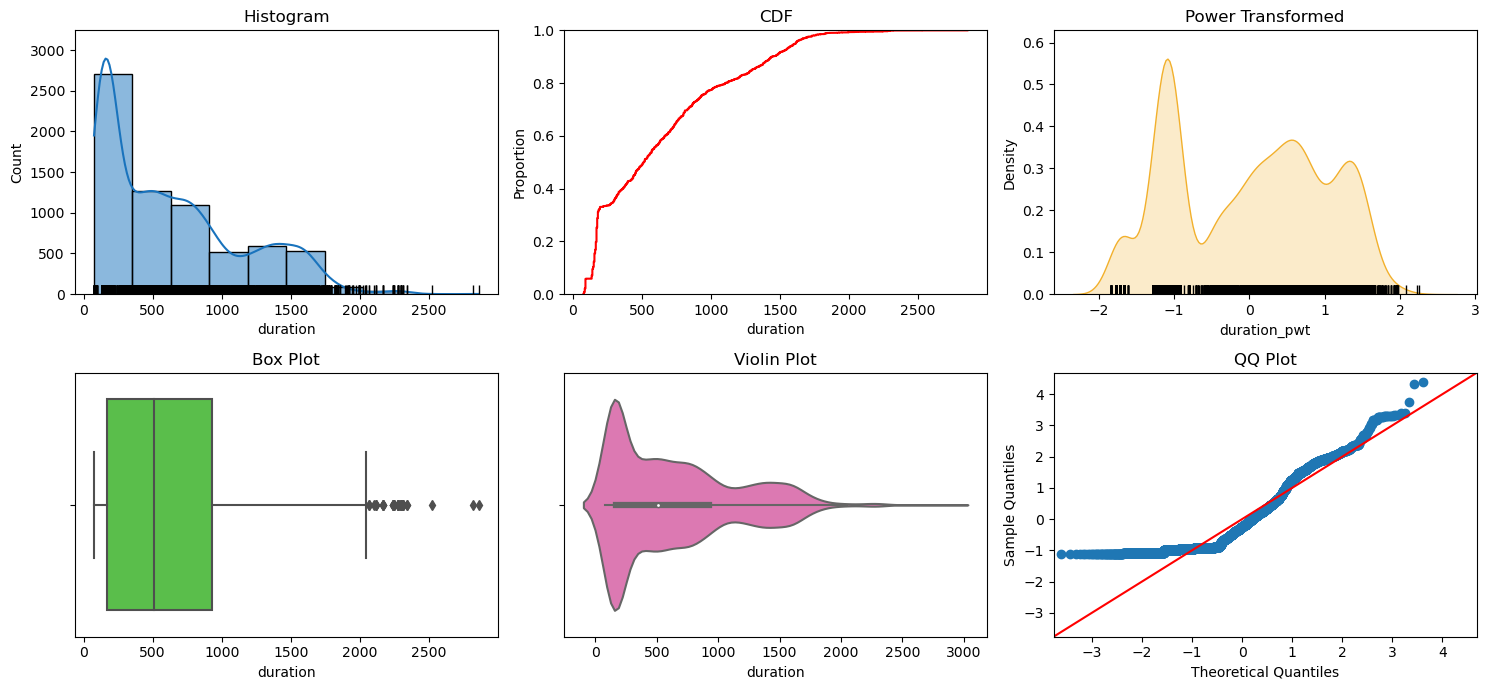

In [70]:
eda_helper_functions.num_univar_plots(train, 'duration')

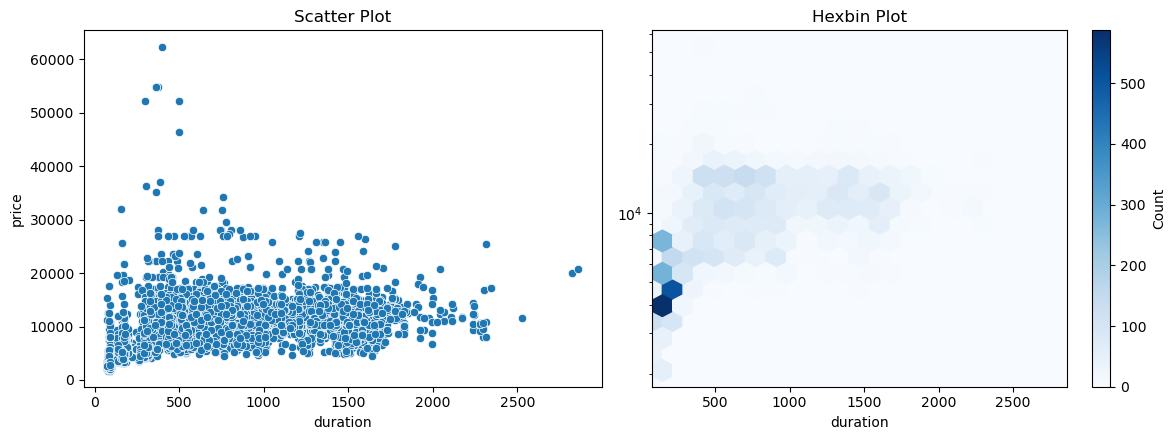

In [74]:
eda_helper_functions.num_bivar_plots(train, 'duration', 'price', hexbin_kwargs = dict(yscale = 'log', gridsize = 20, cmap = 'Blues'))

In [75]:
eda_helper_functions.num_num_hyp_testing(train, 'price', 'duration')

- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.5115623354802311
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


- Significance Level   : 5.0%
- Null Hypothesis      : The samples are uncorrelated
- Alternate Hypothesis : The samples are correlated
- Test Statistic       : 0.6980397232444912
- p-value              : 0.0
- Since p-value is less than 0.05, we Reject the Null Hypothesis at 5.0% significance level
- CONCLUSION: The variables price and duration are correlated


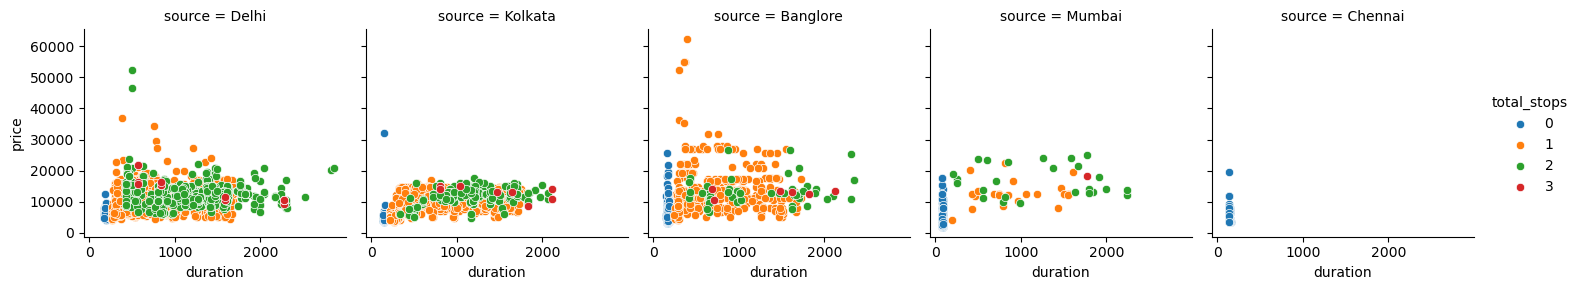

In [80]:
duration_grid = sns.FacetGrid(
    data = train,
    col = 'source',
    hue = 'total_stops',
    sharey = True
)

duration_grid.map(sns.scatterplot, 'duration', 'price')
duration_grid.add_legend()

### Automated EDA

---------------------------------------------------------------------------------------------------------------------------

In [81]:
from ydata_profiling import ProfileReportReport

In [82]:
report = ProfileReport(train)

In [83]:
report

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

#### 6. Additional Info

In [84]:
eda_helper_functions.cat_summary(train, 'additional_info')

0                           No Info
1                           No Info
2                           No Info
3                           No Info
4                           No Info
                   ...             
6830                        No Info
6831                        No Info
6832                        No Info
6833    In-flight meal not included
6834                        No Info
Name: additional_info, Length: 6835, dtype: object

Data Type      : object
Cardinality    : 9 categories
Missing Data   : 0 rows (0.00 %)
Available Data : 6,835 / 6,835 rows


,
count,6835
unique,9
top,No Info
freq,5367


,count,percentage
category,,
No Info,5367,0.785223
In-flight meal not included,1249,0.182736
No check-in baggage included,198,0.028969
1 Long layover,13,0.001902
Change airports,4,0.000585
1 Short layover,1,0.000146
Red-eye flight,1,0.000146
2 Long layover,1,0.000146
Business class,1,0.000146
